# Foundation of Machine Learning Practice Case
***
All the task below will be answered using the given dataset which is provided in the e-Learning System
Dataset is a historical flight data in Malaysia from Oct 2018 – Nov 2018
Data consist of information of flight such as:
1. Date of flight
2. Date of arrival
3. Departure Delay
4. Tail Number
5. Airline Name
6. Departure Location
7. Arrival Location
8. Flight Number
9. Delay

You can add any outsource data to help your task, but you need to put the source of the data in the
glossary
***
There are 3 models that you have to make:
1. Linear Regression
2. Logistic Regression
3. 1 Supervised model you choose


In [1]:
# Import the libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, Markdown
pd.options.display.max_columns = None
pd.options.display.max_rows = 15

data_train = pd.read_csv(r'./dataset/training_dataset.csv', index_col='id')
data_test = pd.read_csv(r'./dataset/test_dataset.csv', index_col='id')

In [2]:
display(data_train.head())
display(data_test.head())

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Sandakan,SDK,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Hanoi,HAN,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
id,,,,,,,,,,,,,,,,,,,,,,,,,
483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Kota Kinabalu,BKI,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27
483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Langkawi,LGK,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95
483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Tokyo,NRT,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20


## Exploratory Data Analysis

In [3]:
# Show the dataset info
print('The training data have shape of {}'.format(data_train.shape))
print('The testing data have shape of {}'.format(data_test.shape))
display(data_train.info())

The training data have shape of (111068, 25)
The testing data have shape of (41557, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111068 entries, 1 to 496596
Data columns (total 25 columns):
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_

None

From above result we can see that the dataset have 25 columns and most of them are object, and some of the columns have `null` value. We should take a closer look at this.

In [4]:
# Convert scheduled_departure_time & scheduled_arrival_time type to datetime
data_train['scheduled_departure_time'] = pd.to_datetime(data_train['scheduled_departure_time'])
data_train['scheduled_arrival_time'] = pd.to_datetime(data_train['scheduled_arrival_time'])
data_test['scheduled_departure_time'] = pd.to_datetime(data_test['scheduled_departure_time'])
data_test['scheduled_arrival_time'] = pd.to_datetime(data_test['scheduled_arrival_time'])

In [5]:
# Check the results
display(data_train[['scheduled_departure_time', 'scheduled_arrival_time']].dtypes)
display(data_test[['scheduled_departure_time', 'scheduled_arrival_time']].dtypes)

scheduled_departure_time    datetime64[ns]
scheduled_arrival_time      datetime64[ns]
dtype: object

scheduled_departure_time    datetime64[ns]
scheduled_arrival_time      datetime64[ns]
dtype: object

## Features Engineering

In [6]:
# Create departure to arrival column
data_train['departure_arrival_aiport_code'] = data_train['departure_airport_code'] + ' : ' + data_train['arrival_airport_code']
data_test['departure_arrival_aiport_code'] = data_test['departure_airport_code'] + ' : ' + data_test['arrival_airport_code']

In [7]:
# Flight duration based on the ticket
data_train['ticket_flight_duration'] = (data_train['scheduled_arrival_time'] - data_train['scheduled_departure_time']).astype('timedelta64[m]')
data_test['ticket_flight_duration'] = (data_test['scheduled_arrival_time'] - data_test['scheduled_departure_time']).astype('timedelta64[m]')

In [8]:
# Change the flight_duration column format to minutes
data_train['flight_duration'] = pd.to_timedelta(data_train['flight_duration']).astype('timedelta64[m]')
data_test['flight_duration'] = pd.to_timedelta(data_train['flight_duration']).astype('timedelta64[m]')

In [9]:
# Check the most common flights
display(data_train['departure_arrival_aiport_code'].value_counts())

KUL : SIN    7938
KUL : BKI    3540
KUL : PEN    3501
PEN : KUL    3448
BKI : KUL    3241
KUL : KCH    3017
KUL : CGK    2920
             ... 
JHB : SYX       3
SZB : XSP       2
KUL : CNS       2
LBU : KCH       2
KUL : GUM       1
KUL : LUX       1
KUL : AVV       1
Name: departure_arrival_aiport_code, Length: 303, dtype: int64

In [10]:
# Check the actual flight duration, ticket flight duration, and delay
display(data_train[['flight_duration','ticket_flight_duration', 'delay']])

,flight_duration,ticket_flight_duration,delay
id,,,
1,58.0,65.0,2
2,115.0,115.0,8
3,115.0,115.0,8
4,174.0,175.0,0
5,197.0,195.0,0
6,59.0,70.0,0
7,61.0,65.0,0
...,...,...,...
496495,30.0,30.0,0


In [11]:
# Distribution of the delay
display(data_train['delay'].describe())

count    111068.000000
mean         11.540210
std          26.806913
min           0.000000
25%           0.000000
50%           1.000000
75%          13.000000
max         978.000000
Name: delay, dtype: float64

In [12]:
# Categorize the delay
data_train['delay_cat'] = pd.cut(data_train['delay'], bins=(0, 1, 13, 978), labels=['low', 'medium', 'high'], include_lowest=True)
data_test['delay_cat'] = pd.cut(data_test['delay'], bins=(0, 1, 13, 978), labels=['low', 'medium', 'high'], include_lowest=True)

In [13]:
# Categorize the departure time
data_train['departure_time_cat'] = pd.cut(data_train['scheduled_departure_time'].dt.hour, bins=(0, 6, 12, 18, 24), labels=['6to12', '12to18', '18to24', '24to6'], include_lowest=True)
data_test['departure_time_cat'] = pd.cut(data_test['scheduled_departure_time'].dt.hour, bins=(0, 6, 12, 18, 24), labels=['6to12', '12to18', '18to24', '24to6'], include_lowest=True)

**1. Provide travel recommendation to passenger (best time to take a flight or best airline), so they will
not get caught in delay. Each recommendation has to be supported by at least 1 graph**

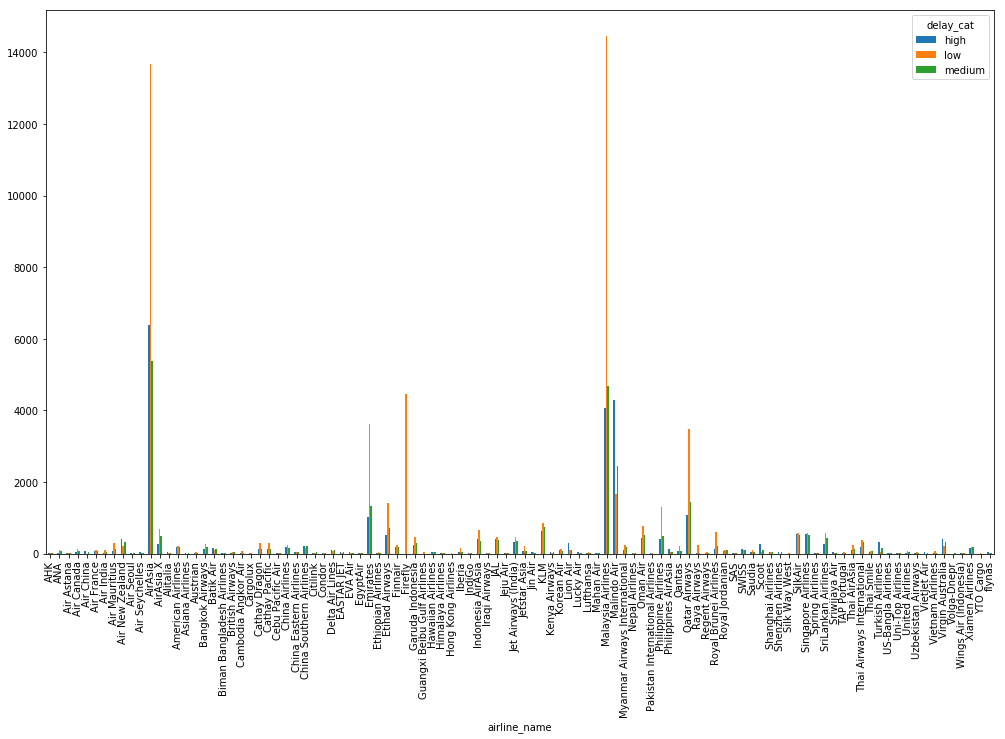

In [14]:
fig, ax = plt.subplots(figsize=(17,10))
data_train.groupby(by='airline_name')['delay_cat'].value_counts().unstack().plot(ax=ax, kind='bar')
plt.show()

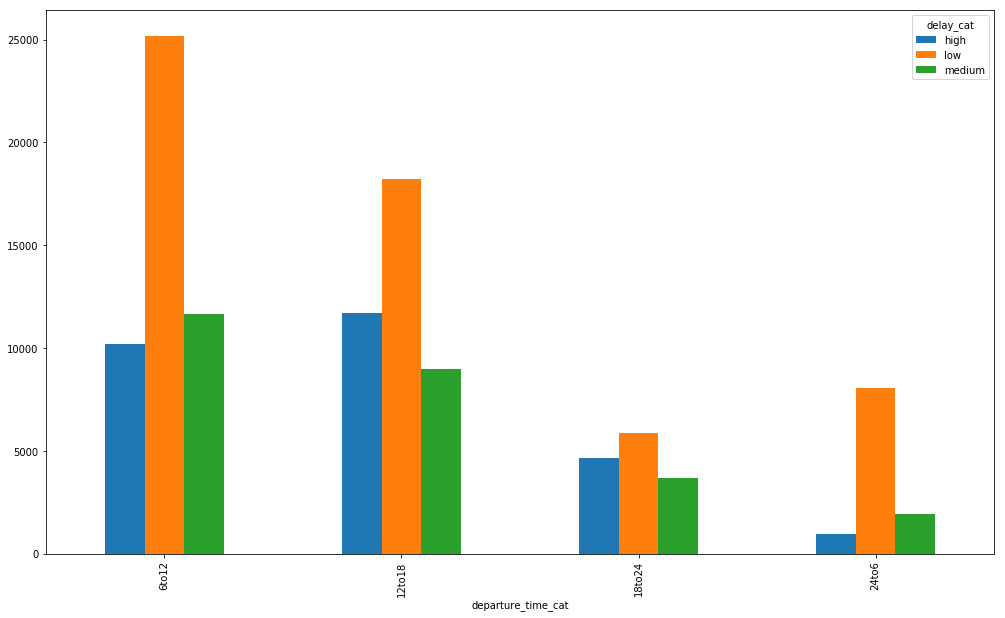

In [15]:
fig, ax = plt.subplots(figsize=(17,10))
data_train.groupby(by='departure_time_cat')['delay_cat'].value_counts().unstack().plot(ax=ax, kind='bar')
plt.show()

In [16]:
# Low delay airline
print('Airlines with highest percentage of low delay:')
display(data_train.groupby(by='airline_name')['delay_cat'].value_counts(normalize=True).unstack()['low'].sort_values(ascending=False).head(15))
print('Airlines with lowest percentage of low delay:')
display(data_train.groupby(by='airline_name')['delay_cat'].value_counts(normalize=True).unstack()['low'].sort_values(ascending=False).tail(15))

Airlines with highest percentage of low delay:


airline_name
Hong Kong Airlines             1.000000
Guangxi Beibu Gulf Airlines    1.000000
Firefly                        1.000000
YTO Cargo                      1.000000
Silk Way West                  1.000000
TAP Portugal                   0.885714
Raya Airways                   0.879699
Spring Airlines                0.685714
EgyptAir                       0.666667
Royal Brunei Airlines          0.639698
Malaysia Airlines              0.623545
Air Mauritius                  0.620172
Air India                      0.610390
Emirates                       0.606106
Vietnam Airlines               0.605505
Name: low, dtype: float64

Airlines with lowest percentage of low delay:


airline_name
Iraqi Airways        0.111111
Nepal Airlines       0.107143
Turkish Airlines     0.100733
EASTAR JET           0.100000
Condor               0.076923
Sriwijaya Air        0.070175
Air Seychelles       0.020408
Alitalia             0.017544
flynas               0.017544
Air China                 NaN
Air Seoul                 NaN
Asiana Airlines           NaN
Shenzhen Airlines         NaN
VietJet Air               NaN
Volga-Dnepr               NaN
Name: low, dtype: float64

In [17]:
# Medium delay airline
print('Airlines with highest percentage of medium delay:')
display(data_train.groupby(by='airline_name')['delay_cat'].value_counts(normalize=True).unstack()['medium'].sort_values(ascending=False).head(15))
print('Airlines with lowest percentage of medium delay:')
display(data_train.groupby(by='airline_name')['delay_cat'].value_counts(normalize=True).unstack()['medium'].sort_values(ascending=False).tail(15))

Airlines with highest percentage of medium delay:


airline_name
Volga-Dnepr                   1.000000
Iraqi Airways                 0.555556
EASTAR JET                    0.544444
Condor                        0.538462
Citilink                      0.508772
Thai Smile                    0.412791
SAS                           0.403509
Lufthansa                     0.403509
Shenzhen Airlines             0.388889
Xiamen Airlines               0.375734
Austrian                      0.370370
IndiGo                        0.366667
Thai Airways International    0.366165
Air China                     0.364486
China Southern Airlines       0.362007
Name: medium, dtype: float64

Airlines with lowest percentage of medium delay:


airline_name
Mahan Air                          0.152174
Himalaya Airlines                  0.136364
Regent Airways                     0.135593
Air Astana                         0.120000
Nepal Airlines                     0.107143
TAP Portugal                       0.057143
Raya Airways                       0.041353
VietJet Air                        0.017544
Cargolux                                NaN
Firefly                                 NaN
Guangxi Beibu Gulf Airlines             NaN
Hong Kong Airlines                      NaN
Pakistan International Airlines         NaN
Silk Way West                           NaN
YTO Cargo                               NaN
Name: medium, dtype: float64

In [18]:
# High delay airline
print('Airlines with highest percentage of high delay:')
display(data_train.groupby(by='airline_name')['delay_cat'].value_counts(normalize=True).unstack()['high'].sort_values(ascending=False).head(15))
print('Airlines with lowest percentage of high delay:')
display(data_train.groupby(by='airline_name')['delay_cat'].value_counts(normalize=True).unstack()['high'].sort_values(ascending=False).tail(15))

Airlines with highest percentage of high delay:


airline_name
VietJet Air                        0.982456
Asiana Airlines                    0.800000
Air Seoul                          0.800000
Nepal Airlines                     0.785714
Alitalia                           0.719298
flynas                             0.719298
Air Seychelles                     0.714286
Pakistan International Airlines    0.708333
Sriwijaya Air                      0.649123
Air China                          0.635514
Shenzhen Airlines                  0.611111
Scoot                              0.608076
Philippines AirAsia                0.602871
Lion Air                           0.602362
Turkish Airlines                   0.595238
Name: high, dtype: float64

Airlines with lowest percentage of high delay:


airline_name
Air Mauritius                  0.124464
ANA                            0.117647
Jeju Air                       0.114286
Air India                      0.103896
EgyptAir                       0.083333
Raya Airways                   0.078947
Austrian                       0.074074
TAP Portugal                   0.057143
Lufthansa                      0.052632
Firefly                             NaN
Guangxi Beibu Gulf Airlines         NaN
Hong Kong Airlines                  NaN
Silk Way West                       NaN
Volga-Dnepr                         NaN
YTO Cargo                           NaN
Name: high, dtype: float64

In [19]:
print('Depart time percentage of low delay:')
display(data_train.groupby(by='departure_time_cat')['delay_cat'].value_counts(normalize=True).unstack()['low'].sort_values(ascending=False))
print('Depart time percentage of high delay:')
display(data_train.groupby(by='departure_time_cat')['delay_cat'].value_counts(normalize=True).unstack()['high'].sort_values(ascending=False))

Depart time percentage of low delay:


departure_time_cat
24to6     0.737265
6to12     0.535613
12to18    0.467819
18to24    0.412516
Name: low, dtype: float64

Depart time percentage of high delay:


departure_time_cat
18to24    0.326654
12to18    0.300994
6to12     0.216785
24to6     0.087731
Name: high, dtype: float64

From above results we can see the distribution delay categories for each of the airlines, remember that the categories of the delay is:

| delay_cat | binning |
|--------|----------|
| low | 0 - 1   |
| medium | 1 - 13 |
| high | 13 - 978 |

So for some peoples low to medium delay still tolerable, from above table you can see the percentage of low to high delay for each airlines. For example I can recommend that a passenger use `Hongkong Airlines` since all of their flights are in low delay category. Another example is `Malaysia Airlines` have a good percentage of low delay flights which is above 60%, and if we combine this with the most highest percentage of low delay from departure time which is `24to6` with value above 70%, we will have a good faith that the flight won't delay.

The vice versa of this is of course to avoid the airlines that have a high percentage of high delay category, for example `Asiana Airlines` and `Air Seoul` since the data showed that most of the flights from this airlines are in the high delay category. We also want to avoid the `18to24` departure time, since this time window have the most percentage of high delay.

**2. Create a model to estimate the delay duration ( Linear Regression )**

In [20]:
display(data_train.nunique().sort_values(ascending=False))

scheduled_arrival_time           14210
scheduled_departure_time         12912
number                            2515
flight_duration                    692
delay                              350
departure_arrival_aiport_code      303
arrival_airport_gate               267
                                 ...  
departure_airport_terminal           6
arrival_airport_region               4
departure_time_cat                   4
delay_cat                            3
departure_airport_country            1
departure_airport_region             1
departure_airport_timezone           1
Length: 29, dtype: int64

In [21]:
data_lr_train = data_train.dropna(axis=0, subset=['ticket_flight_duration', 'flight_equipment_iata'])
data_lr_test = data_test.dropna(axis=0, subset=['ticket_flight_duration', 'flight_equipment_iata'])
X_train = data_lr_train.drop(['number', 'airline_name', 'scheduled_departure_time',
       'scheduled_arrival_time', 'departure_airport_city',
       'departure_airport_code', 'departure_airport_country',
       'departure_airport_gate', 'departure_airport_name',
       'departure_airport_region', 'departure_airport_terminal',
       'departure_airport_timezone', 'arrival_airport_city',
       'arrival_airport_code', 'arrival_airport_country',
       'arrival_airport_gate', 'arrival_airport_name',
       'arrival_airport_region', 'arrival_airport_terminal',
       'arrival_airport_timezone','flight_equipment_name',
       'flight_duration', 'delay', 'delay_cat'], axis=1)
y_train = data_lr_train['delay']
X_test = data_lr_test.drop(['number', 'airline_name', 'scheduled_departure_time',
       'scheduled_arrival_time', 'departure_airport_city',
       'departure_airport_code', 'departure_airport_country',
       'departure_airport_gate', 'departure_airport_name',
       'departure_airport_region', 'departure_airport_terminal',
       'departure_airport_timezone', 'arrival_airport_city',
       'arrival_airport_code', 'arrival_airport_country',
       'arrival_airport_gate', 'arrival_airport_name',
       'arrival_airport_region', 'arrival_airport_terminal',
       'arrival_airport_timezone','flight_equipment_name',
       'flight_duration', 'delay', 'delay_cat'], axis=1)
y_test = data_lr_test['delay']

In [22]:
X_train = pd.get_dummies(X_train, dummy_na=True, drop_first=True)
X_test = pd.get_dummies(X_test, dummy_na=True, drop_first=True)
# Get missing columns in the training test
missing_cols = set(X_train.columns) - set(X_test.columns )
# Add a missing column in test set with default value equal to 0
for col in missing_cols:
    X_test[col] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [23]:
from sklearn.linear_model import LinearRegression

classifier_lr = LinearRegression()
classifier_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = classifier_lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error

print('MAE:' , mean_absolute_error(y_test, y_pred))

MAE: 15.111666410476774


**3. Create a model to predict delay > 60 min ( Logistic regression and another supervised model you
choosing )**

In [26]:
from sklearn.linear_model import LogisticRegression

y_train = data_lr_train['delay'].apply(lambda x: 1 if x > 60 else 0)
y_test = data_lr_test['delay'].apply(lambda x: 1 if x > 60 else 0)

In [27]:
classifier_lor = LogisticRegression()
classifier_lor.fit(X_train, y_train)

C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = classifier_lor.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print('accuracy:', score)

accuracy: 0.9407277277759061


In [31]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(max_depth=3)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_pred = classifier_dt.predict(X_test)

In [33]:
score = accuracy_score(y_test, y_pred)
print('accuracy:', score)

accuracy: 0.9414978100784521


**4. Did you do some feature engineering on the dataset ? if yes, please give the reason for each
feature you created**

***
1. The code combination of departure and arrival airport, because I want to look if certain departure and arrival combo have any effect on the delay
2. Ticket flight duration, we can compare it to the flight duration and use it as predictor (because we can't use flight duration as it is a future data)
3. Bin the departure time into four categories, I want to see if certain departure time have effect on the delay. Also for answering question 1
4. Bin the delay into three categories, reason is the same as number 3

**5. Using those models predict delay that will happened in December for delay >60**

In [72]:
# Using the logistic regression model
y_pred = classifier_lor.predict(X_test)
data_pred = X_test.copy()

In [73]:
data_pred['delay_pred'] = y_pred

In [82]:
# Show the flight that predicted will suffer delay > 60mins
display(data_lr_test.loc[data_pred['delay_pred']==1])

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,departure_arrival_aiport_code,ticket_flight_duration,delay_cat,departure_time_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
483818,SV3841,SV,Saudia,2018-12-01 07:30:00,2018-12-01 17:00:00,Kuala Lumpur,KUL,MY,C14,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,31,KUL : MED,570.0,high,12to18
483868,SV3843,SV,Saudia,2018-12-01 08:30:00,2018-12-01 18:00:00,Kuala Lumpur,KUL,MY,C3,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,31,KUL : MED,570.0,high,12to18
495189,SV3805,SV,Saudia,2018-12-02 07:30:00,2018-12-02 17:00:00,Kuala Lumpur,KUL,MY,C1,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,14,KUL : MED,570.0,high,12to18
495235,SV3807,SV,Saudia,2018-12-02 08:30:00,2018-12-02 18:00:00,Kuala Lumpur,KUL,MY,C4,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,17,KUL : MED,570.0,high,12to18
506760,SV3843,SV,Saudia,2018-12-03 07:30:00,2018-12-03 17:00:00,Kuala Lumpur,KUL,MY,C4,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,41,KUL : MED,570.0,high,12to18
506805,SV3845,SV,Saudia,2018-12-03 08:30:00,2018-12-03 18:00:00,Kuala Lumpur,KUL,MY,C1,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,13,KUL : MED,570.0,medium,12to18
518157,SV3829,SV,Saudia,2018-12-04 07:30:00,2018-12-04 17:00:00,Kuala Lumpur,KUL,MY,C1,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Madinah,MED,SA,NaN,Prince Mohammad Bin Abdulaziz International Ai...,Middle East,NaN,Asia/Riyadh,332,Airbus A330-200,NaN,29,KUL : MED,570.0,high,12to18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656755,CI6596,CI,China Airlines,2018-12-16 06:00:00,2018-12-16 09:00:00,Penang,PEN,MY,NaN,Penang International Airport,Asia,NaN,Asia/Kuala_Lumpur,Hanoi,HAN,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,747,Boeing 747 Passenger,NaN,29,PEN : HAN,180.0,high,6to12
